

# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset used in this notebook is the FBI Gun Datasets, which include two dataset, one is a number of background checks from FBI upon any gun purchases, the other one is a Census Data including various census related variables.

The FBI Gun data inclues a range of different background check types, to name a few, 'permit', 'permit_recheck', 'handgun', 'long_gun', 'multiple'(purchasing more than one gun per background check). For each month, each state, there's a data point consisting all the above mentioned variables. Among all the variables, only the 'totals' variable will be used here, which means the total number of all the various background checks in each state and month.

##Questions to explore:

- Is there a seasonal pattern for firearm shopping?
- Which countries have had the highest gun registration in  2010 and 2016? 
- What is the most purchased type of gun in 2017?
- What is the average revenue of firms of all the states in 2012?
- What census data is most associated with high gun per capita?
- Which states have had the highest growth in gun registrations?
- What is the overall trend of gun purchases?

In [0]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [0]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_gun = pd.read_csv('gun_data_copy.csv')
df_census = pd.read_csv('U.S. Census Data.csv')

In [0]:
df_gun.head()

month       state  ...  return_to_seller_other  totals
0  2017-09     Alabama  ...                     3.0   32019
1  2017-09      Alaska  ...                     0.0    6303
2  2017-09     Arizona  ...                     0.0   28394
3  2017-09    Arkansas  ...                     1.0   17747
4  2017-09  California  ...                     0.0  123506

[5 rows x 27 columns]

In [0]:
df_gun.describe()

permit  permit_recheck  ...  return_to_seller_other         totals
count   12461.000000     1100.000000  ...             2255.000000   12485.000000
mean     6413.629404     1165.956364  ...                0.105987   21595.725911
std     23752.338269     9224.200609  ...                0.427363   32591.418387
min         0.000000        0.000000  ...                0.000000       0.000000
25%         0.000000        0.000000  ...                0.000000    4638.000000
50%       518.000000        0.000000  ...                0.000000   12399.000000
75%      4272.000000        0.000000  ...                0.000000   25453.000000
max    522188.000000   116681.000000  ...                4.000000  541978.000000

[8 rows x 25 columns]

In [0]:
df_census.head()

Fact  ...  Wyoming
0       Population estimates, July 1, 2016,  (V2016)  ...  585,501
1  Population estimates base, April 1, 2010,  (V2...  ...  563,767
2  Population, percent change - April 1, 2010 (es...  ...    3.90%
3                  Population, Census, April 1, 2010  ...  563,626
4  Persons under 5 years, percent, July 1, 2016, ...  ...    6.50%

[5 rows x 52 columns]



### Data Cleaning (gun_data)

In [0]:
df_gun.shape

(12485, 27)

In [0]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [0]:
df_gun.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'], dtype=object)

In [0]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [0]:
# drop duplicates
# Confirm changes

df_gun.drop_duplicates(inplace=True)
sum(df_gun.duplicated())

0

In [0]:
# Replace the all NaN in df with 'No Record' 
df_gun.fillna('No record', inplace = True)
# Confirm changes 
df_gun.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

### Data Cleaning (census_data)

In [0]:
#Droppping all the columns that is not associated with gun_data and reset its index
df_census = df_census.drop(df_census.index[65: 85]).reset_index()

In [0]:
# All the NAs become 0.0
df_census= df_census.fillna(0.0)

In [0]:
df_census.head()

index                                               Fact  ...  Wisconsin  Wyoming
0      0       Population estimates, July 1, 2016,  (V2016)  ...  5,778,708  585,501
1      1  Population estimates base, April 1, 2010,  (V2...  ...  5,687,289  563,767
2      2  Population, percent change - April 1, 2010 (es...  ...      1.60%    3.90%
3      3                  Population, Census, April 1, 2010  ...  5,686,986  563,626
4      4  Persons under 5 years, percent, July 1, 2016, ...  ...      5.80%    6.50%

[5 rows x 53 columns]

In [0]:
#Rename index into state before joining 
df_census.rename(columns={'index':'state'},inplace = True)

In [0]:
df_census.head()

state                                               Fact  ...  Wisconsin  Wyoming
0      0       Population estimates, July 1, 2016,  (V2016)  ...  5,778,708  585,501
1      1  Population estimates base, April 1, 2010,  (V2...  ...  5,687,289  563,767
2      2  Population, percent change - April 1, 2010 (es...  ...      1.60%    3.90%
3      3                  Population, Census, April 1, 2010  ...  5,686,986  563,626
4      4  Persons under 5 years, percent, July 1, 2016, ...  ...      5.80%    6.50%

[5 rows x 53 columns]

<a id='eda'></a>
## Exploratory Data Analysis


### Reaserch Question 1: Is there a seasonal pattern for firearm shopping?

In [0]:
all_df_gun_totals = df_gun[['month','totals']]

In [0]:
all_df_gun_totals.set_index('month',inplace=True)

In [0]:
all_df_gun_totals=all_df_gun_totals[::-1]

In [0]:
gun_totals_groupby_month = all_df_gun_totals.groupby('month').sum()

In [0]:
gun_totals_groupby_month.head()

totals
month          
1998-11   21176
1998-12  870722
1999-01  585974
1999-02  690215
1999-03  741687

Let's start the exploration by visualizing the data in some plots

Text(0.5, 0, '# Background Checks')

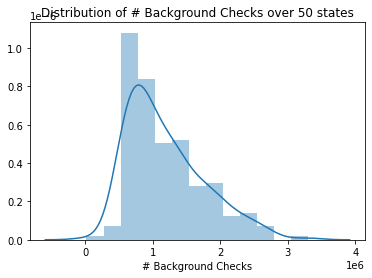

In [0]:
ax = sns.distplot(gun_totals_groupby_month)
ax.set_title('Distribution of # Background Checks over 50 states')
ax.set_xlabel('# Background Checks')

Text(0.5, 0, '#Background Checks')

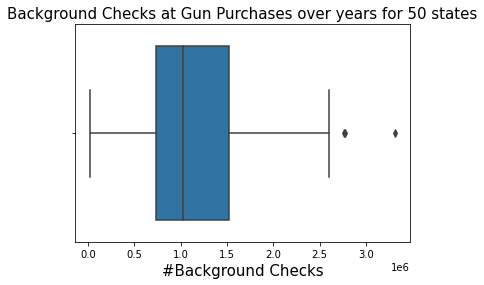

In [0]:
# Let's see what's the box
ax = sns.boxplot(gun_totals_groupby_month)
ax.set_title('Background Checks at Gun Purchases over years for 50 states', fontsize=15)
ax.set_xlabel('#Background Checks', fontsize=15)

It seems we have a couple of outliers

Let's see the line plot to detect if any patterns:





Text(0, 0.5, '#Background Checks')

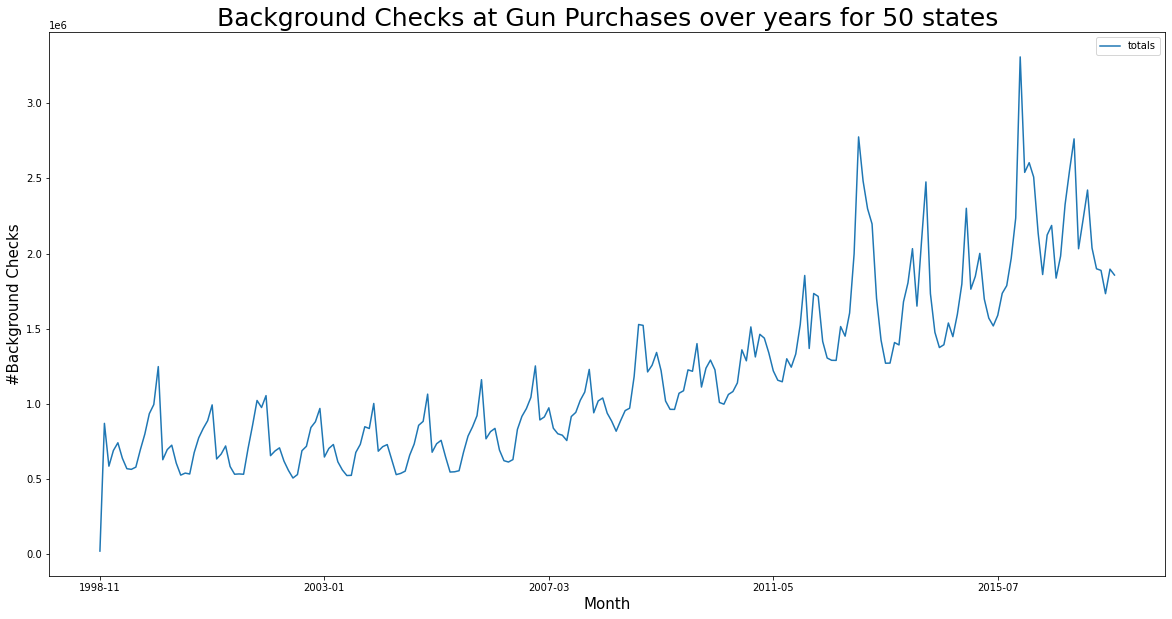

In [0]:
ax = gun_totals_groupby_month.plot(figsize=(20,10))
ax.set_title('Background Checks at Gun Purchases over years for 50 states', fontsize=25)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('#Background Checks', fontsize=15)
# not run yet

Note: We can see a sort of pattern here. But this is too broad to confirm a seasonal pattern. Let's take a look at the pattern closely in each year at the next step

Yearly Group Pattern graph
The two graphs below show the numbers changes in each year from Jan to Dec.

As you can see from the above graph, from 2007, the number is going up, so the yearly graph will be divided into two graphs, one with year from 1999 to 2006, the other one with year from 2007 to 2016. The years 1998 and 2017 are excluded because their data are not complete(including less than 12 months）

[]

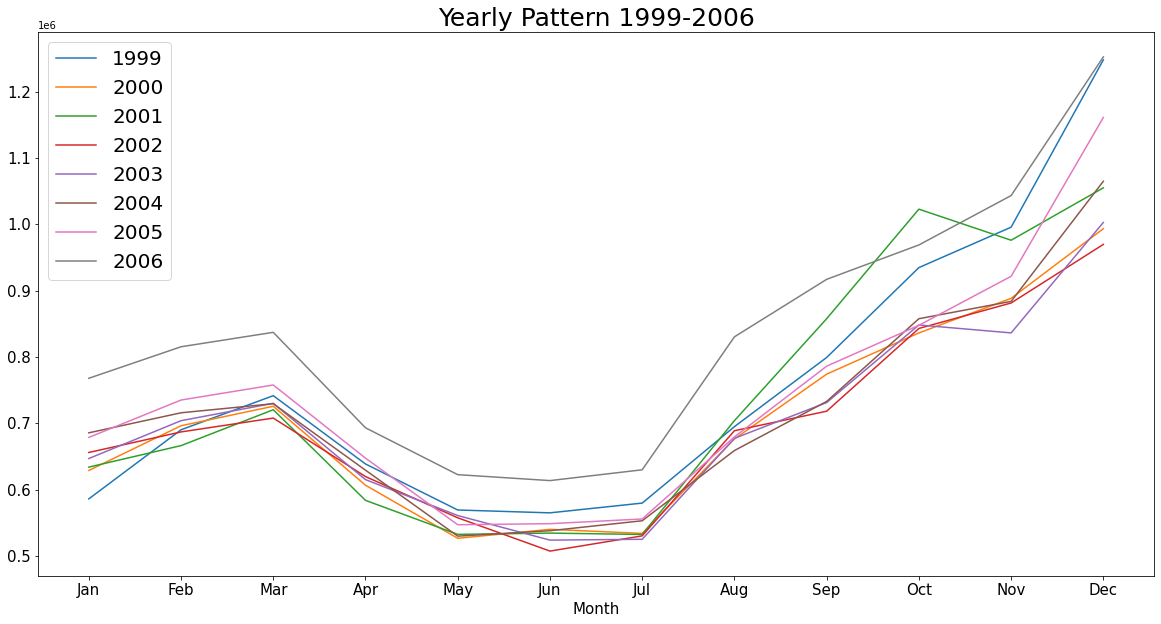

In [0]:
ax = gun_totals_groupby_month.loc['1999':'2000'].plot(figsize=(20,10),fontsize=15) #add the year 1999's plot first
legend =['1999']
for i in range(2000,2007): #excluding 1998 and 2017, for they are not complete
    ax = gun_totals_groupby_month.loc[str(i):str(i+1)].plot(ax=ax)
    legend.append(str(i))
ax.legend(legend,fontsize=20)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']),fontdict={
     'fontsize': 15,
     'fontweight': 15})
ax.set_title('Yearly Pattern 1999-2006', fontsize=25)
ax.set_xlabel('Month', fontsize=15)
ax.plot()

[]

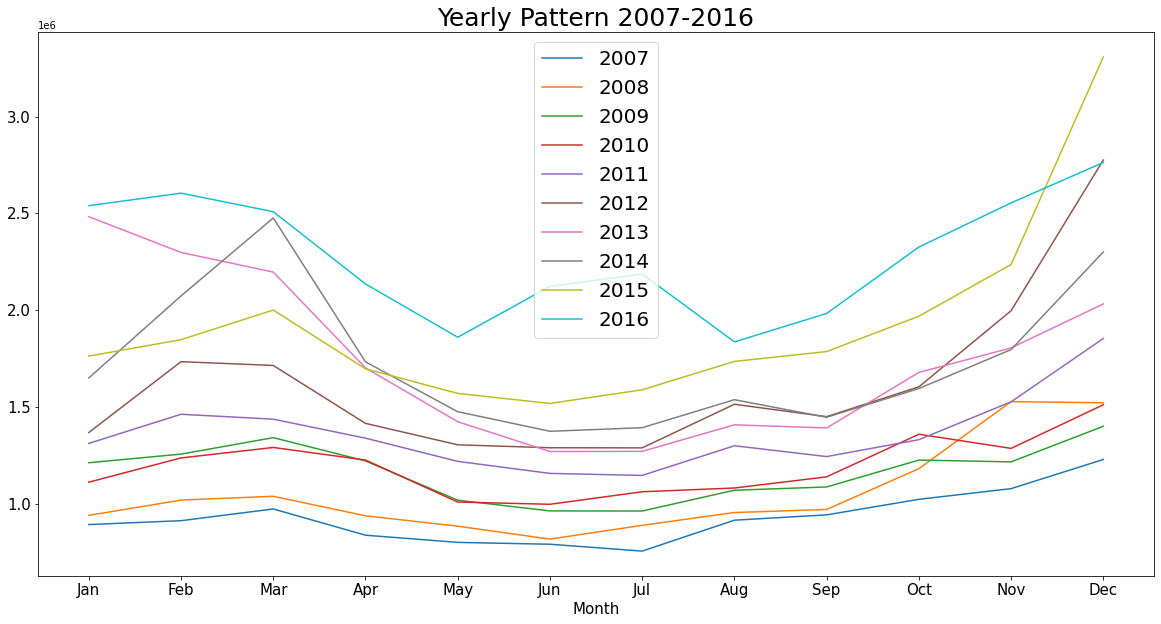

In [0]:
ax = gun_totals_groupby_month.loc['2007':'2008'].plot(figsize=(20,10),fontsize=15) #add the year 1999's plot first
legend =['2007']
for i in range(2008,2017): #excluding 1998 and 2017, for they are not complete
    ax = gun_totals_groupby_month.loc[str(i):str(i+1)].plot(ax=ax)
    legend.append(str(i))
ax.legend(legend,fontsize=20)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']),fontdict={
     'fontsize': 15,
     'fontweight': 15})
ax.set_title('Yearly Pattern 2007-2016', fontsize=25)
ax.set_xlabel('Month', fontsize=15)
ax.plot()

As we can see from the plot from year 1999 to 2016, there is a significant pattern that the total number of background checks stays low during the summer and peaks at winter. So, the answer to this research question is: Yes, there's a seasonal pattern for background checks, and thus, for firearm shopping.

One thing worth noting is that, the number of 2016 has a little peak during the summer as opposed to other years, which worth some future research. A good question to ask is if there's a new regulation change on gun control.

### Research Question 2: Gun Trend in the yesr 2017

What is the most purchased type of gun in 2017?

In [0]:
#Display g_017
g_017 = df_gun[df_gun['month'] == '2017-09' ]
g_017.head()

month       state  ... return_to_seller_other  totals
0  2017-09     Alabama  ...                      3   32019
1  2017-09      Alaska  ...                      0    6303
2  2017-09     Arizona  ...                      0   28394
3  2017-09    Arkansas  ...                      1   17747
4  2017-09  California  ...                      0  123506

[5 rows x 27 columns]

In [0]:
g_017['handgun'].sum()

478082.0

In [0]:
g_017['long_gun'].sum()

417305.0

In [0]:
g_017['other'].sum()

26924.0

In [0]:
g_017['multiple'].sum()

17638

In [0]:
#Trendy Gun bought (other, mutiple, handgun, long_gun)
gun = ['handgun', 'long_gun', 'other', 'multiple']
purchases = [478082, 417305,26924,17638]

In [0]:
yman = np.arange(len(gun))
yman

array([0, 1, 2, 3])

No handles with labels found to put in legend.


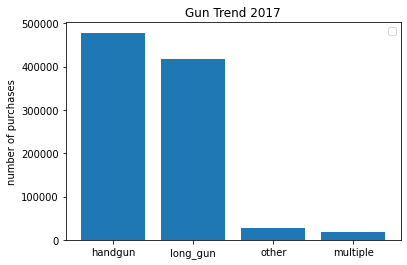

In [0]:
plt.xticks(yman, gun)
plt.ylabel('number of purchases')
plt.title('Gun Trend 2017')
plt.bar(yman, purchases )
plt.legend()

<a id='conclusions'></a>
## Conclusions

1.Is there a seasonal pattern for firearm shopping?

Yes. From the year-to-year analysis from 1999 and 2016 of all the states, there's a clear pattern that the number stays low in the summer and peaks in the winter. There's a little inconsistency during the summer of 2016, which we need to research further into what happened before or during that summer.

2.Gun Trend in the year 2017
Ans:Most purchased gun in 2017
*   Handgun
*   Longun
*   other
*   mutiple










#Limitations

I replace gun data's missing values with a default value of each columns and remove 'Fact Note' column since it has exceeding number of Nan values. Missing data can occur because of nonresponse: no information is provided.for the gun data, missing value can be caused by nonreponse or limitation regulation or lack of gathering data. My solution for replaing missing data with a default *value* and drop null columns are not time consuming.

In [0]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255